In [1]:
import numpy as np
import pandas as pd
from functions import utils,scoring

from functions import functions as utils2
from functions import classification_utils

import plotly.express as px
from IPython.display import display, HTML
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
#display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_colwidth', None)

In [182]:

df_train =  utils2.reduce_memory_usage(pd.read_csv('data/application_train.csv'))
#df_train.to_csv('data/application_train.csv',index=False)

df_test =utils2.reduce_memory_usage( pd.read_csv('data/application_test.csv'))
#df_test.to_csv('data/application_test.csv',index=False)

df_bureau =utils2.reduce_memory_usage( pd.read_csv('data/bureau.csv'))
#df_bureau.to_csv('data/bureau.csv',index=False)

df_bureau_balance = utils2.reduce_memory_usage(pd.read_csv('data/bureau_balance.csv'))
#df_bureau_balance.to_csv('data/bureau_balance.csv',index=False)

df_pos_cash_balance = utils2.reduce_memory_usage(pd.read_csv('data/POS_CASH_balance.csv'))
#df_pos_cash_balance.to_csv('data/POS_CASH_balance.csv',index=False)

df_credit_card_balance=utils2.reduce_memory_usage(pd.read_csv('data/credit_card_balance.csv'))
#df_credit_card_balance.to_csv('data/credit_card_balance.csv',index=False)

df_previous_application = utils2.reduce_memory_usage(pd.read_csv('data/previous_application.csv'))
#df_previous_application.to_csv('data/previous_application.csv',index=False)

df_installments_payments = utils2.reduce_memory_usage(pd.read_csv('data/installments_payments.csv'))
#df_installments_payments.to_csv('data/installments_payments.csv',index=False)

doc=utils2.reduce_memory_usage(pd.read_csv('data/HomeCredit_columns_description.csv',encoding='unicode_escape'))
#doc.to_csv('data/HomeCredit_columns_description.csv',index=False)
def find_doc(cols):
    return(doc[doc['Row'].isin(cols)])


Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%
Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 112.95 MB
Decreased by 49.3%
Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 338.46 MB
Decreased by 45.8%
Memory usage of dataframe is 610.43 MB
Memory usage after optimization is: 238.45 MB
Decreased by 60.9%
Memory usage of dataframe is 673.88 MB
Memory usage after optimization is: 289.33 MB
Decreased by 57.1%
Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 309.01 MB
Decreased by 34.5%
Memory usage of dataframe is 830.41 MB
Memory usage after optimization is: 311.40 MB
Decreased by 62.5%
Memory usage of dataframe is 0.01 MB
Memory usage after optimization is: 0.01 MB
Decreased by 14.8%


# Partie 1: Analyse exploiratoire des données

In [183]:

df_train = pd.read_csv('data/train_cleaned_aggregated.csv')
df_test = pd.read_csv('data/test_cleaned_aggregated.csv')


In [184]:
"""
#take too much time to finish
params={
 'df_train':df_train,
 'df_test':df_test ,
 'df_bureau':df_bureau ,
 'df_bureau_balance':df_bureau_balance ,
 'df_pos_cash_balance':df_pos_cash_balance ,
 'df_credit_card_balance':df_credit_card_balance,
 'df_previous_application':df_previous_application , 
 'df_installments_payments':df_installments_payments 
    }
main_df,df_train,df_test=scoring.clean_aggreagte(params)
main_df.to_csv('data/main_df.csv',index=False)

df_train,df_test=scoring.clean_aggreagte(params)
df_train.to_csv('data/train_cleaned_aggregated.csv',index=False)
df_test.to_csv('data/test_cleaned_aggregated.csv',index=False)
"""

"\n#take too much time to finish\nparams={\n 'df_train':df_train,\n 'df_test':df_test ,\n 'df_bureau':df_bureau ,\n 'df_bureau_balance':df_bureau_balance ,\n 'df_pos_cash_balance':df_pos_cash_balance ,\n 'df_credit_card_balance':df_credit_card_balance,\n 'df_previous_application':df_previous_application , \n 'df_installments_payments':df_installments_payments \n    }\nmain_df,df_train,df_test=scoring.clean_aggreagte(params)\nmain_df.to_csv('data/main_df.csv',index=False)\n\ndf_train,df_test=scoring.clean_aggreagte(params)\ndf_train.to_csv('data/train_cleaned_aggregated.csv',index=False)\ndf_test.to_csv('data/test_cleaned_aggregated.csv',index=False)\n"

In [185]:
"""
df_train=pd.read_csv('data/main_df.csv')
df_train=main_df[~pd.isna(main_df['TARGET'])]
df_test=main_df[pd.isna(main_df['TARGET'])]
"""

"\ndf_train=pd.read_csv('data/main_df.csv')\ndf_train=main_df[~pd.isna(main_df['TARGET'])]\ndf_test=main_df[pd.isna(main_df['TARGET'])]\n"

In [186]:
df_train.shape

(307511, 76)

In [187]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   SK_ID_CURR                                                 307511 non-null  int64  
 1   TARGET                                                     307511 non-null  float64
 2   NAME_CONTRACT_TYPE                                         307511 non-null  object 
 3   CODE_GENDER                                                307511 non-null  object 
 4   FLAG_OWN_CAR                                               307511 non-null  object 
 5   FLAG_OWN_REALTY                                            307511 non-null  object 
 6   CNT_CHILDREN                                               307511 non-null  int64  
 7   AMT_INCOME_TOTAL                                           307511 non-null  float64

In [188]:
len(df_train[df_train.isna().any(axis=1)])

83350

* Aucun doublon de clients dans l'échantillon d'entrainement selon l'identifiant unique SK_ID_CURR

In [189]:

len(df_train.loc[df_train.duplicated(subset='SK_ID_CURR',keep='first')]) ## 0 aucun doublons

0

* Aucun doublon de clients dans l'échantillon de test selon l'identifiant unique SK_ID_CURR

In [190]:

len(df_test.loc[df_test.duplicated(subset='SK_ID_CURR',keep='first')]) ## 0 aucun doublons

0

76 variables dont:
* 50 numériques
* 26 catégorielles

In [191]:

numeric_cols=df_train.select_dtypes(exclude = ['object']).columns.tolist()
string_cols=df_train.select_dtypes(include = ['object']).columns.tolist()
print('len(numeric_cols)',len(numeric_cols))
print('len(string_cols)',len(string_cols))

len(numeric_cols) 50
len(string_cols) 26


### 1-1 <u>Analyse univariée de la variable cible TARGET </u>

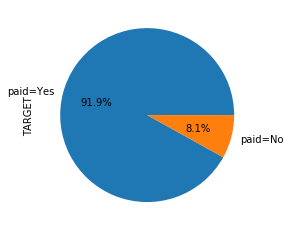

In [192]:
df_train['TARGET'].map(lambda x: 'paid=No' if x==1 else 'paid=Yes')\
    .value_counts()\
    .plot\
    .pie(autopct='%1.1f%%')

on note un déséquilibre de classe:
* 8.1% des clients sont en défaut de paiement
* 91.9% des clients ne sont pas en défaut de paiement 

### 1-2 <u>Analyse variables catégorielles</u>

In [193]:
 
na_df=utils.columns_na_percentage(df_train[string_cols])
na_columns=na_df[na_df['na_rate_percent']>30] ## 6 colonnes ont  des valeurs nulles
na_columns


,Column,na_rate_percent


In [194]:
if len(na_columns)>0:
    utils.draw_completion(df_train[string_cols],na_columns.shape[0])

* suppression de ces variables, vu leur imputation difficile et leur potentielle indisponibilité lors de la classification

In [195]:
cols_to_remove = [col for col in na_columns['Column'].tolist() if col not in ['OCCUPATION_TYPE']]
"""
cols_to_remove = [col for col in na_columns['Column'].tolist() if col not in ['OCCUPATION_TYPE']]
df_train.drop(columns=cols_to_remove,axis=1,inplace=True)
df_test.drop(columns=cols_to_remove,axis=1,inplace=True)
df_train.shape
"""
for col in cols_to_remove:
    df_train[col]=df_train[col].fillna('unknown')
    df_test[col]=df_test[col].fillna('unknown')


In [196]:
relevant_string_cols=[col for col in string_cols if col not in cols_to_remove]
relevant_string_cols=df_train.select_dtypes(include = ['object']).columns.tolist()

* suppression de la colonne ORGANIZATION_TYPE du fait de son encodage très large 58 variables

In [197]:
for col in relevant_string_cols:
    if df_train[col].nunique() >10:
        if col in df_train.columns.tolist():
            df_train.drop(columns=[col],axis=1,inplace=True)
        if col in df_test.columns.tolist():
            df_test.drop(columns=[col],axis=1,inplace=True)
            

In [198]:

numeric_cols=df_train.select_dtypes(exclude = ['object']).columns.tolist()
string_cols=df_train.select_dtypes(include = ['object']).columns.tolist()
print('len(numeric_cols)',len(numeric_cols))
print('len(string_cols)',len(string_cols))

len(numeric_cols) 50
len(string_cols) 20


In [199]:
df_train.isnull().sum()/len(df_train)*100

SK_ID_CURR                                        0.000000
TARGET                                            0.000000
NAME_CONTRACT_TYPE                                0.000000
CODE_GENDER                                       0.000000
FLAG_OWN_CAR                                      0.000000
                                                    ...   
frequent-pos_cash_balance-NAME_CONTRACT_STATUS    5.875237
installments_payments_DAYS_INSTALMENT_mean        5.160141
installments_payments_DAYS_ENTRY_PAYMENT_mean     5.162742
installments_payments_AMT_INSTALMENT_mean         5.160141
installments_payments_AMT_PAYMENT_mean            5.162742
Length: 70, dtype: float64

#### 1-2-1 <u>Analyse des type prêts</u>

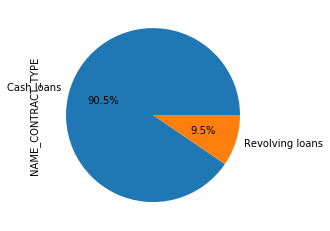

In [200]:
df_train['NAME_CONTRACT_TYPE']\
    .value_counts()\
    .plot\
    .pie(autopct='%1.1f%%')

* la majorité des prêts sont des prêts de trésorerie(découvert etc ...)
* les crédits renouvelables (revolving loans) sont moindres avec un taux de solvabilité beaucoup plus réduit

#### 1-2-2 <u>Analyse de la civilité</u>

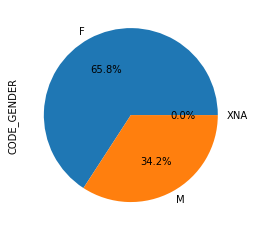

In [201]:
df_train['CODE_GENDER']\
    .value_counts()\
    .plot\
    .pie(autopct='%1.1f%%')

* 65 % des emprunteurs sont des femmes

#### 1-2-3 <u>Analyse des types de revenus</u>

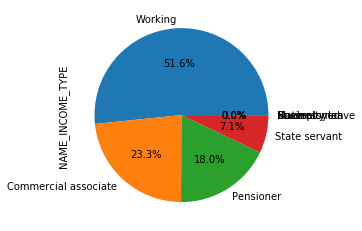

In [202]:
df_train['NAME_INCOME_TYPE']\
    .value_counts()\
    .plot\
    .pie(autopct='%1.1f%%')

* 51% sont des revenus ouvriers

#### 1-2-4 <u>Analyse de la possession de voiture ou pas</u>

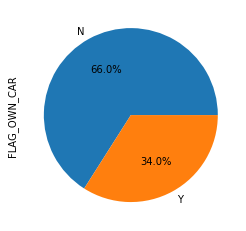

In [203]:
df_train['FLAG_OWN_CAR']\
    .value_counts()\
    .plot\
    .pie(autopct='%1.1f%%')

* 66% des emprunteurs ne possèdent pas de voitures

#### 1-2-5 <u>Analyse de la possession de biens immobiliers</u>

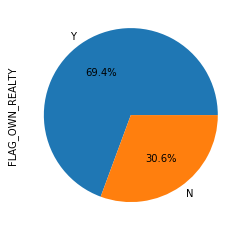

In [204]:
df_train['FLAG_OWN_REALTY']\
    .value_counts()\
    .plot\
    .pie(autopct='%1.1f%%')

* 69 % possèdent un bien immobilier

#### 1-2-6 <u>Analyse du status marital</u>

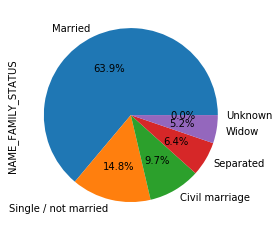

In [205]:
df_train['NAME_FAMILY_STATUS']\
    .value_counts()\
    .plot\
    .pie(autopct='%1.1f%%')

* 69% sont mariés

#### 1-2-7 <u>Analyse du niveau d'éducation</u>

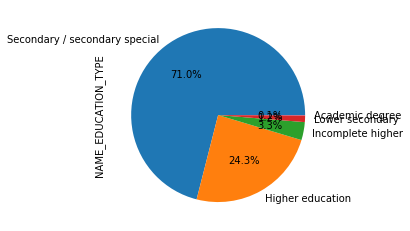

In [206]:

df_train['NAME_EDUCATION_TYPE']\
    .value_counts()\
    .plot\
    .pie(autopct='%1.1f%%')

71 % ont un niveau d'éducation secondaire

#### 1-2-8 <u>Analyse l'habitat immobilier</u>

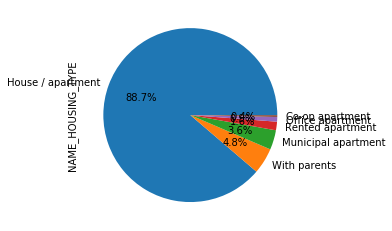

In [207]:
df_train['NAME_HOUSING_TYPE']\
    .value_counts()\
    .plot\
    .pie(autopct='%1.1f%%')

* 88 % habitent dans une maison ou appartement

### 1-3 <u>Analyse variables numériques</u>

* suppression des variables scores EXT_SOURCE_2, EXT_SOURCE_3 au sens où ils peuvent être inconnus au moment de la classification

In [243]:
find_doc(['EXT_SOURCE_2'])[['Row','Description']]

,Row,Description
42,EXT_SOURCE_2,Normalized score from external data source


In [208]:
UNRELEVANT_COLS=['EXT_SOURCE_2','EXT_SOURCE_3']
for col in UNRELEVANT_COLS:
    if col in numeric_cols:
        numeric_cols.remove(col)
if set(UNRELEVANT_COLS).issubset(df_train.columns.tolist()):
    df_train.drop(columns=UNRELEVANT_COLS,axis=1,inplace=True)
    
if set(UNRELEVANT_COLS).issubset(df_test.columns.tolist()):
    df_test.drop(columns=UNRELEVANT_COLS,axis=1,inplace=True)

In [209]:
for col in df_train.columns.tolist():
    if col.endswith('_x'):
        new_col=col.replace('_x','')
        df_train.rename(columns={col: new_col, }, inplace=True)
        df_test.rename(columns={col: new_col, }, inplace=True)
    if col.endswith('_y'):
        new_col=col.replace('_y','')
        df_train.rename(columns={col: new_col, }, inplace=True)
        df_test.rename(columns={col: new_col, }, inplace=True)

In [210]:
 
na_df=utils.columns_na_percentage(df_train)
na_columns=na_df[na_df['na_rate_percent']>0] ## 25 colonnes ont  des valeurs nulles



* imputation des valeurs manquantes par la moyenne

In [211]:
col='COUNT_PAST_HOME_LOANS'
df_train[col]=df_train[col].fillna(0)
df_test[col]=df_test[col].fillna(0)
"""
for col in na_columns['Column']:
    df_train[col]=df_train[col].fillna(df_train[col].mean())
    df_test[col]=df_test[col].fillna(df_test[col].mean())
"""

"\nfor col in na_columns['Column']:\n    df_train[col]=df_train[col].fillna(df_train[col].mean())\n    df_test[col]=df_test[col].fillna(df_test[col].mean())\n"

In [212]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 68 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   SK_ID_CURR                                                 307511 non-null  int64  
 1   TARGET                                                     307511 non-null  float64
 2   NAME_CONTRACT_TYPE                                         307511 non-null  object 
 3   CODE_GENDER                                                307511 non-null  object 
 4   FLAG_OWN_CAR                                               307511 non-null  object 
 5   FLAG_OWN_REALTY                                            307511 non-null  object 
 6   CNT_CHILDREN                                               307511 non-null  int64  
 7   AMT_INCOME_TOTAL                                           307511 non-null  float64

In [213]:
df_test.isnull().sum()/len(df_test)*100

SK_ID_CURR                                          0.000000
TARGET                                            100.000000
NAME_CONTRACT_TYPE                                  0.000000
CODE_GENDER                                         0.000000
FLAG_OWN_CAR                                        0.000000
                                                     ...    
frequent-pos_cash_balance-NAME_CONTRACT_STATUS      1.920236
installments_payments_DAYS_INSTALMENT_mean          1.641228
installments_payments_DAYS_ENTRY_PAYMENT_mean       1.643279
installments_payments_AMT_INSTALMENT_mean           1.641228
installments_payments_AMT_PAYMENT_mean              1.643279
Length: 68, dtype: float64

In [214]:
df_train[['AGE','AGE_LOAN_FINISH','PRO_SENIORITY','ACCOUNT_SENIORITY']].describe()

,AGE,AGE_LOAN_FINISH,PRO_SENIORITY,ACCOUNT_SENIORITY
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,44.433090,66.045329,-174.303742,14.165679
std,11.954493,14.979324,386.994347,9.646868
min,21.000000,30.333204,-1000.000000,-0.000000
25%,35.000000,54.172958,1.000000,6.000000
50%,44.000000,66.204071,4.000000,13.000000
75%,54.000000,77.708820,8.000000,21.000000
max,70.000000,110.891640,50.000000,68.000000


* imputation des valeurs négatives concernant les variables ages par zéro
* conversion en euros des montants du prêts
* imputation par zéro des valeurs moyennes

In [244]:

age_cols=['AGE','AGE_LOAN_FINISH','PRO_SENIORITY','ACCOUNT_SENIORITY']

for col in age_cols:
    df_train[col] = df_train[col].apply(lambda x : x if x > 0 else 0)
    df_test[col] = df_test[col].apply(lambda x : x if x > 0 else 0)
currency=86   
df_train['AMT_GOODS_PRICE']=df_train['AMT_GOODS_PRICE']/currency
df_train['AMT_CREDIT']=df_train['AMT_CREDIT']/currency
df_train['AMT_ANNUITY']=df_train['AMT_ANNUITY']/currency
df_train['AMT_INCOME_TOTAL']=df_train['AMT_INCOME_TOTAL']/currency

df_test['AMT_GOODS_PRICE']=df_test['AMT_GOODS_PRICE']/currency
df_test['AMT_CREDIT']=df_test['AMT_CREDIT']/currency
df_test['AMT_ANNUITY']=df_test['AMT_ANNUITY']/currency
df_test['AMT_INCOME_TOTAL']=df_test['AMT_INCOME_TOTAL']/currency

for col in df_train.columns.tolist():
    if col.endswith('mean'):
        df_train[col]= df_train[col].fillna(df_train[col].median())
        df_test[col]=  df_test[col].fillna(df_test[col].median())


In [216]:
def corr_target(df_train):
    # List of new correlations
    new_corrs = []

    # Iterate through the columns 
    for col in df_train.select_dtypes(exclude = ['object']).columns.tolist():
    #for col in cols:
        # Calculate correlation with the target
        corr = df_train['TARGET'].corr(df_train[col])

        # Append the list as a tuple

        new_corrs.append((col, corr))

    # Sort the correlations by the absolute value
    # Make sure to reverse to put the largest values at the front of list
    new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
    return new_corrs

In [245]:
cols=df_train.select_dtypes(exclude=['object']).columns.tolist()
cols=[col for col in cols if col not in ['TARGET','SK_ID_CURR']]
#test=df_train.corr()[['TARGET']].reset_index().sort_values(by='TARGET',ascending=False)
#test=df_train['TARGET'].corr(df_train[cols])
test=df_train[cols].corrwith(df_train["TARGET"]).reset_index()\
.sort_values(ascending=False,by=0)
test
## variables différence moyenne globale et la moyenne par client

,index,0
24,bureau_DAYS_CREDIT_mean,0.083960
31,bureau_DAYS_CREDIT_UPDATE_mean,0.069687
26,bureau_DAYS_CREDIT_ENDDATE_mean,0.039813
45,installments_payments_DAYS_ENTRY_PAYMENT_mean,0.034770
44,installments_payments_DAYS_INSTALMENT_mean,0.034460
38,previous_application_CNT_PAYMENT_mean,0.032248
41,pos_cash_balance_CNT_INSTALMENT_FUTURE_mean,0.029791
39,pos_cash_balance_MONTHS_BALANCE_mean,0.026813
17,COUNT_PAST_HOME_LOANS,0.023513
23,COUNT_PAST_HOME_LOANS,0.023513


### 1-4 <u>Analyse parrallèles des clients solvables et insolvables</u>

In [218]:
df_train_default=df_train[df_train['TARGET']==1]
df_train_solvable=df_train[df_train['TARGET']==0]


* 24825 clients ont été en défaut de paiements, soit 8,07 % de l'échantillon total d'entrainement

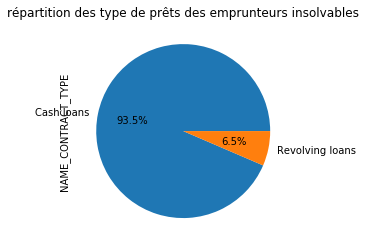

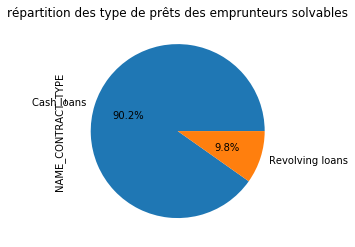

In [219]:
import matplotlib.pyplot as plt
 
df_train_default['NAME_CONTRACT_TYPE']\
     .value_counts(normalize=True)\
    .plot\
    .pie(autopct='%1.1f%%',
         title='répartition des type de prêts des emprunteurs insolvables'
        )
plt.show()

df_train_solvable['NAME_CONTRACT_TYPE']\
    .value_counts(normalize=True)\
    .plot\
    .pie(autopct='%1.1f%%',
        title='répartition des type de prêts des emprunteurs solvables'
        )
plt.show()
 
 
 

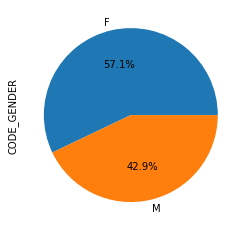

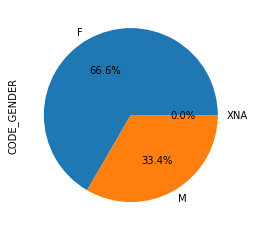

In [220]:
df_train_default['CODE_GENDER']\
    .value_counts(normalize=True)\
    .plot\
    .pie(autopct='%1.1f%%')
plt.show()

df_train_solvable['CODE_GENDER']\
    .value_counts(normalize=True)\
    .plot\
    .pie(autopct='%1.1f%%')
plt.show()
 

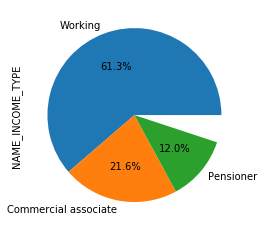

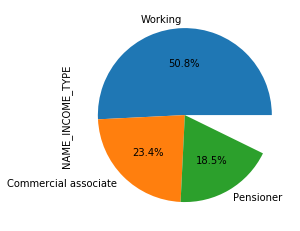

In [221]:
df_train_default['NAME_INCOME_TYPE']\
    .value_counts(normalize=True)\
    .sort_values(ascending=False)\
    .head(3)\
    .plot\
    .pie(autopct='%1.1f%%')
 
plt.show()
df_train_solvable['NAME_INCOME_TYPE']\
   .value_counts(normalize=True)\
    .sort_values(ascending=False)\
    .head(3)\
    .plot\
    .pie(autopct='%1.1f%%')
plt.show()
 

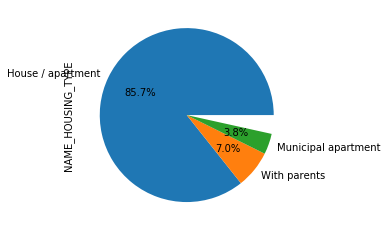

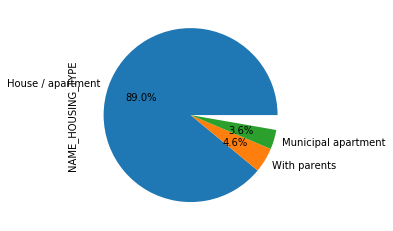

In [222]:
df_train_default['NAME_HOUSING_TYPE']\
    .value_counts(normalize=True)\
    .sort_values(ascending=False)\
    .head(3)\
    .plot\
    .pie(autopct='%1.1f%%')
plt.show()

df_train_solvable['NAME_HOUSING_TYPE']\
    .value_counts(normalize=True)\
    .sort_values(ascending=False)\
    .head(3)\
    .plot\
    .pie(autopct='%1.1f%%')
plt.show()

 

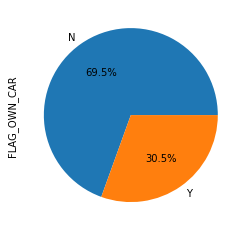

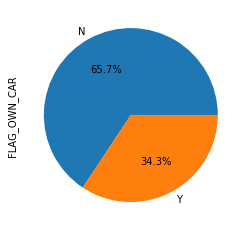

In [223]:
df_train_default['FLAG_OWN_CAR']\
    .value_counts(normalize=True)\
    .sort_values(ascending=False)\
    .head(3)\
    .plot\
    .pie(autopct='%1.1f%%')
plt.show()
 
df_train_solvable['FLAG_OWN_CAR']\
     .value_counts(normalize=True)\
    .sort_values(ascending=False)\
    .head(3)\
    .plot\
    .pie(autopct='%1.1f%%')
plt.show()


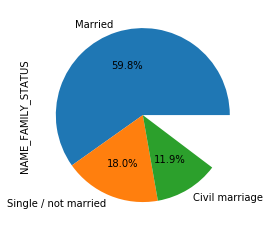

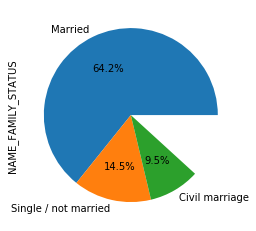

In [224]:
df_train_default['NAME_FAMILY_STATUS']\
   .value_counts(normalize=True)\
    .sort_values(ascending=False)\
    .head(3)\
    .plot\
    .pie(autopct='%1.1f%%')
plt.show()
 

df_train_solvable['NAME_FAMILY_STATUS']\
    .value_counts(normalize=True)\
    .sort_values(ascending=False)\
    .head(3)\
    .plot\
    .pie(autopct='%1.1f%%')

plt.show()

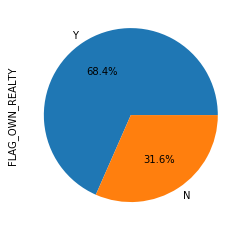

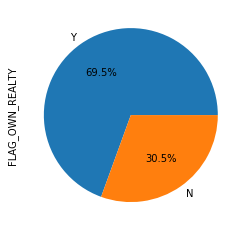

In [225]:
df_train_default['FLAG_OWN_REALTY']\
    .value_counts(normalize=True)\
    .plot\
    .pie(autopct='%1.1f%%')
plt.show()

df_train_solvable['FLAG_OWN_REALTY']\
    .value_counts(normalize=True)\
    .plot\
    .pie(autopct='%1.1f%%')
plt.show()



# Partie 2: Réduction dimensionnelle et étude de faisabilité de la classification

### 1-1 <u>Normalisation des variables numériques et encodage des variables catégorielles</u>

In [226]:
df_train_test=pd.concat([df_train,df_test])

In [227]:
cols_to_normalize=df_train.select_dtypes(exclude = ['object']).columns.tolist()
cols_to_normalize=[col for col in cols_to_normalize if col not in ['SK_ID_CURR','TARGET']]

cols_to_encode=df_train.select_dtypes(include = ['object']).columns.tolist()





In [228]:
df=df_train_test[['SK_ID_CURR','TARGET']+cols_to_normalize].copy()
values_to_normalize=df[cols_to_normalize].values
standardScaler=StandardScaler()

df[cols_to_normalize] = standardScaler.fit_transform(values_to_normalize)

In [229]:
oneHotEncoder = OneHotEncoder(sparse=False)

 
data= oneHotEncoder.fit_transform(df_train_test[cols_to_encode])
new_cols= oneHotEncoder.get_feature_names_out().tolist()
df_hot= pd.DataFrame(columns =new_cols,
              data =data)
for col in new_cols:
    df[col]=df_hot[col]


/home/amadou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


In [230]:
df.to_csv('data/normalized_data.csv',index=False)

In [231]:
regex='bureau_|previous_application|installments_payments|frequent-bureau|frequent-previous|frequent-pos_cash|frequent-credit_card|pos_cash_balance'
REGEX_COLS=[x for x in 
           df.columns[df\
                                 .columns.str.contains(regex)]
          ]
REGEX_COLS
RELEVANT_COLS=[col for col in df.columns.tolist() if col not in REGEX_COLS]
RELEVANT_COLS

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'AGE',
 'PRO_SENIORITY',
 'ACCOUNT_SENIORITY',
 'ANNUITY_AMT_CREDIT_PERCENT',
 'ANNUITY_INCOME_PERCENT',
 'CREDIT_TERM',
 'AGE_LOAN_FINISH',
 'GOODS_LOAN_PERCENT',
 'INCOME_AFTER_ANNUITY',
 'NET_INCOME_PER_FAMILY_HEAD_AFTER_ANNUITY',
 'COUNT_PAST_LOANS',
 'COUNT_PAST_HOME_LOANS',
 'COUNT_PAST_HOME_LOANS',
 'COUNT_POS_SALE',
 'COUNT_CREDIT_SALE',
 'COUNT_PAST_INSTALLMENT',
 'COUNT_PAST_HOME_LOANS',
 'COUNT_PAST_HOME_LOANS',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA',
 'FLAG_OWN_CAR_N',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_

In [232]:
#df=df[RELEVANT_COLS]
df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,AGE,PRO_SENIORITY,...,frequent-previous_application-NAME_YIELD_GROUP_middle,frequent-previous_application-NAME_YIELD_GROUP_nan,frequent-pos_cash_balance-NAME_CONTRACT_STATUS_Active,frequent-pos_cash_balance-NAME_CONTRACT_STATUS_Amortized debt,frequent-pos_cash_balance-NAME_CONTRACT_STATUS_Approved,frequent-pos_cash_balance-NAME_CONTRACT_STATUS_Completed,frequent-pos_cash_balance-NAME_CONTRACT_STATUS_Demand,frequent-pos_cash_balance-NAME_CONTRACT_STATUS_Returned to the store,frequent-pos_cash_balance-NAME_CONTRACT_STATUS_Signed,frequent-pos_cash_balance-NAME_CONTRACT_STATUS_nan
0,100002,1.0,-0.575137,0.144890,-0.454489,-0.184961,-0.483003,-1.268646,-1.544742,-0.591386,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0.0,-0.575137,0.446895,1.770432,0.561551,1.643812,-0.167249,0.130185,-0.278968,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,-0.575137,-0.459119,-1.135828,-1.403389,-1.073101,-1.268646,0.716409,-0.747595,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,-0.575137,-0.157114,-0.690088,0.153474,-0.630527,-0.167249,0.716409,0.502077,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0.0,-0.575137,-0.217515,-0.187564,-0.377393,-0.040428,-1.268646,0.883902,0.502077,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,NaN,-0.575137,-0.217515,-0.439531,-0.675509,-0.704290,-1.268646,0.883902,1.439330,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48740,456222,NaN,2.201186,-0.056446,0.086913,0.304365,-0.089603,2.035545,-1.126010,-0.278968,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48741,456223,NaN,0.813025,0.144890,-0.684274,0.392333,-0.581352,0.934148,-0.037308,0.502077,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48742,456224,NaN,-0.575137,0.245559,-0.345608,-0.155944,-0.212541,-0.167249,-0.456040,0.345868,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [248]:
len(features)

153

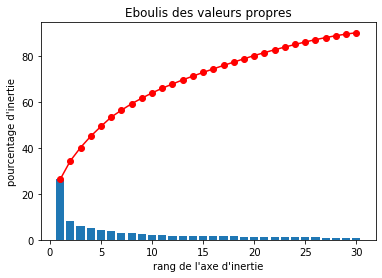

array([0.2631882 , 0.34436672, 0.40251747, 0.45188347, 0.4946964 ,
       0.53517561, 0.56523637, 0.59349646, 0.61780094, 0.64057364,
       0.66128958, 0.67951164, 0.69751337, 0.71396688, 0.73005421,
       0.74545648, 0.76052929, 0.77507054, 0.78939678, 0.80361728,
       0.8163223 , 0.828762  , 0.84059639, 0.85188375, 0.86292415,
       0.87296205, 0.88195389, 0.89016888, 0.89720365, 0.90321684])

In [233]:
features = [col for col in df.columns.tolist() if col not in ['SK_ID_CURR','TARGET']]
data=df[features].values
pca=PCA(0.90)
pca.fit(data)
# Eboulis des valeurs propres
utils2.display_scree_plot(pca)


pca.explained_variance_ratio_.cumsum()

In [234]:
columns = ['pca_%i' % i for i in range(pca.n_components_)]
df_pca = pd.DataFrame(pca.transform(data), columns=columns, index=df.index)

df_pca['TARGET']=df['TARGET']
df_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,TARGET
0,-3.289602,0.682378,-2.516198,-0.194621,0.440889,1.173184,0.185299,0.853802,1.279258,-0.307340,...,0.042378,-0.285269,0.471056,-0.201548,-0.976245,-0.066536,0.382285,-0.128684,-0.439406,1.0
1,-0.637048,5.467822,1.668006,0.116442,0.979841,-0.664324,-1.208354,-1.763571,-0.048712,1.492974,...,0.605597,-0.480158,0.071276,0.558058,0.821256,0.454951,-0.195640,-0.809032,1.015368,0.0
2,-4.300237,-1.953914,-0.527544,-0.687756,-0.812491,1.651664,-0.424124,-0.775658,0.243182,1.388916,...,0.228259,0.407452,-0.210403,0.190528,0.309339,-1.179552,0.145423,0.625465,-0.542566,0.0
3,4.307502,0.729648,-3.607555,0.716760,-1.101886,-0.032950,-0.028246,-2.745908,-0.208353,-0.483055,...,-0.076917,0.871824,-0.283186,-0.404473,-0.198968,0.466268,0.346880,0.063882,-0.197900,0.0
4,1.668164,0.084698,0.880126,-0.851195,-0.972251,1.445623,0.073299,-0.133891,0.113917,-0.147989,...,0.990197,0.372525,-0.465224,0.066850,1.385493,-0.159847,-1.291367,0.699323,-0.291344,0.0


In [235]:
df_pca.to_csv('data/df_pca.csv',index=False)

In [236]:
df_pca_train = df_pca[~pd.isna(df_pca['TARGET'])]


In [237]:
df_pca_train.shape

(307511, 31)

In [238]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [239]:
# Set Training and Testing Data
random_state=42
from sklearn.model_selection import train_test_split
feature = df_pca_train.drop('TARGET', axis=1)

# Select Target
target = df_pca_train['TARGET']


X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    stratify=target,
                                                    random_state=random_state)

In [246]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=random_state)
#dtc = RandomForestClassifier(random_state=random_state)

dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8449343934442223
Precision: 0.11175271739130435
Recall: 0.132527693856999
F1 Score: 0.12125679535612273
Cohens Kappa Score: 0.036895261795820256
Area Under Curve: 0.5200117686802417
Confusion Matrix:
 [[51308  5230]
 [ 4307   658]]
